In [1]:
import pandas as pd
import zipfile

In [2]:
# https://stackoverflow.com/questions/40744027/using-pandas-read-csv-with-zip-compression/45771620#45771620
zf = zipfile.ZipFile("archive.zip") 
df_application = pd.read_csv(zf.open("application_record.csv"))
df_credit = pd.read_csv(zf.open("credit_record.csv"))

In [3]:
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
# Put df_credit into a dictionary
# dict_credit's keys will be the IDs,
# The value will be another dictionary with months_balance as 
# the key and status as the value

dict_credit = {}
for index in df_credit.index:
    if (df_credit.at[index, "ID"] not in dict_credit):
        dict_credit[df_credit.at[index, "ID"]] = {df_credit.at[index, "MONTHS_BALANCE"]:df_credit.at[index, "STATUS"]}
    else:
        dict_credit[df_credit.at[index, "ID"]][df_credit.at[index, "MONTHS_BALANCE"]] = df_credit.at[index, "STATUS"]

In [6]:
# Now transform the dictionary into an array that's like
# [last month's status, ..., first month's status]
# A person can have record from -50 month to -36 month and stopped
# using the service.

for _, (ID, value) in enumerate(dict_credit.items()):
    a_list = []
    len_months = -len(value)
    
    # Set a while loop to change value -> list
    i = 0
    start = 0
    while (len_months != i):
        if (i not in value):
            len_months -= 1
        else:
            start = 1
            a_list.append(value[i])
        i -= 1
        
    dict_credit[ID] = a_list

In [7]:
# Simple way to turn the information into a value
# is to count how long this person has been using
# our service

dict_months = dict_credit.copy()

for _, (ID, records) in enumerate(dict_months.items()):
    dict_months[ID] = len(records)

In [8]:
# Turn into a dataframe
df_months = pd.DataFrame.from_dict(dict_months, orient="index")
df_months.columns = ["months"]
df_months

,months
5001711,4
5001712,19
5001713,22
5001714,15
5001715,60
...,...
5150482,18
5150483,18
5150484,13
5150485,2


In [9]:
# Join months and application data
df_application.set_index("ID", inplace=True)
df = df_application.join(df_months, how="inner")
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,months
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,16
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,30
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,18
5150483,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,18
5150484,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,13
5150485,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0,2


<AxesSubplot:>

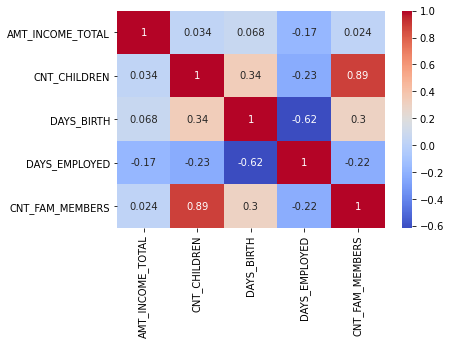

In [10]:
# scale numerical data and check if any features are highly correlated
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'CNT_FAM_MEMBERS']] = scaler.fit_transform(df[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']])

sns.heatmap(df[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_BIRTH', 
                'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']].corr(), cmap= 'coolwarm', annot=True)

In [11]:
df = df.drop(columns=['FLAG_MOBIL', 'CNT_FAM_MEMBERS'])

In [12]:
# X, C, 0, 1 = good
# 2, 3, 4, 5 = bad

# iterate through rows and find score for each index: +num for good, -num for bad, then divide by # entries
score = []
score_dict = {"X": 3, "C": 2, "0": 1, "1": 0, "2" : -1, "3": -2, "4": -3, "5": -4}
for i in df.index:
    cred = 0
    for status in dict_credit[i]:
        cred += score_dict[status]
    score.append(cred/dict_months[i])
    
df.insert(len(df.columns), 'score', score)

In [13]:
score2 = []
for i in df.index: # if any 2, 3, 4, 5: bad applicant, otherwise good
    cred = 0
    if '2' in dict_credit[i] or '3' in dict_credit[i] or '4' in dict_credit[i] or '5' in dict_credit[i]:
        cred = 1
        
    score2.append(cred)

df.insert(len(df.columns), 'score2', score2)

In [14]:
df.to_csv("data.csv")